In [1]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import re

with open('../bin/textbook-urls.txt', 'r') as f:
    urls = f.read().splitlines()

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns#"><head><meta charset="utf-8"/><link href="/favicon.ico" rel="shortcut icon"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><link href="/dist/assets/manifest.json" rel="manifest"/><script>!function(e,t,a,n,g){e[n]=e[n]||[],e[n].push({"gtm.start":(new Date).getTime(),event:"gtm.js"});var m=t.getElementsByTagName(a)[0],r=t.createElement(a);r.async=!0,r.src="https://www.googletagmanager.com/gtm.js?id=GTM-W6N7PB",m.parentNode.insertBefore(r,m)}(window,document,"script","dataLayer")</script><script>!function(e,a,t,n,c,g,o){e.GoogleAnalyticsObject=c,e.ga=e.ga||function(){(e.ga.q=e.ga.q||[]).push(arguments)},e.ga.l=1*new Date,g=a.createElement(t),o=a.getElementsByTagName(t)[0],g.async=1,g.src="https://www.google-analytics.com/analytics.js",o.parentNode.insertBefore(g,o)}(window,document,"script",0,"ga")</script><script>function gtag(){window.dataLayer=window.dataLayer||[],dataLayer.push(argumen
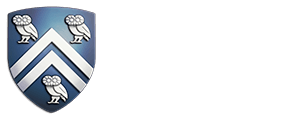

In [8]:
import requests

def getText(URL):
    r = requests.get(URL)
    soup = BeautifulSoup(r.text, 'html.parser')
    # all_text = soup.get_text().lstrip('Learning Objectives').rstrip('PreviousNext')
    # selection_text = re.sub('PreviousNext.+', '', all_text, flags=re.DOTALL)
    # selection_text = re.sub('.+Learning Objectives', '', selection_text, flags=re.DOTALL)
    return soup

getText('https://openstax.org/books/algebra-and-trigonometry-2e/pages/1-introduction-to-prerequisites')

## requests_html

Problems..

In [2]:
import nest_asyncio
nest_asyncio.apply()
from requests_html import AsyncHTMLSession
asession = AsyncHTMLSession()

In [8]:
async def getFirstPage():
    r = await asession.get(urls[0])
    await r.html.arender()
    return r

res = asession.run(getFirstPage)

## Selenium

In [ ]:
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
service = Service(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

In [ ]:
driver = webdriver.Chrome()
driver.get(my_url)
p_element = driver.find_element_by_id(id_='intro-text')
print(p_element.text)

## PyQt4

In [27]:
import sys
from PyQt6.QtGui import Q
from PyQt6.QtCore import QUrl, Q
from PyQt6.QtWebKit import QWebPage
import bs4 as bs
import urllib.request

class Client(QWebPage):

    def __init__(self, url):
        self.app = QApplication(sys.argv)
        QWebPage.__init__(self)
        self.loadFinished.connect(self.on_page_load)
        self.mainFrame().load(QUrl(url))
        self.app.exec_()
        
    def on_page_load(self):
        self.app.quit()
        
url = 'https://pythonprogramming.net/parsememcparseface/'
client_response = Client(url)
source = client_response.mainFrame().toHtml()
soup = bs.BeautifulSoup(source, 'lxml')
js_test = soup.find('p', class_='jstest')
print(js_test.text)

ImportError: libEGL.so.1: cannot open shared object file: No such file or directory

In [48]:
def getText(URL):
    r = requests.get(URL)
    soup = BeautifulSoup(r.text, 'html.parser')
    all_text = soup.get_text().lstrip('Learning Objectives').rstrip('PreviousNext')
    selection_text = re.sub('PreviousNext.+', '', all_text, flags=re.DOTALL)
    selection_text = re.sub('.+Learning Objectives', '', selection_text, flags=re.DOTALL)
    return(selection_text)
urls[:10]

['https://openstax.org/details/books/algebra-and-trigonometry/pages/preface',
 'https://openstax.org/details/books/algebra-and-trigonometry-2e/pages/preface',
 'https://openstax.org/details/books/calculus-volume-1/pages/preface',
 'https://openstax.org/details/books/calculus-volume-2/pages/preface',
 'https://openstax.org/details/books/calculus-volume-3/pages/preface',
 'https://openstax.org/details/books/college-algebra/pages/preface',
 'https://openstax.org/details/books/college-algebra-2e/pages/preface',
 'https://openstax.org/details/books/college-algebra-corequisite-support/pages/preface',
 'https://openstax.org/details/books/college-algebra-corequisite-support-2e/pages/preface',
 'https://openstax.org/details/books/elementary-algebra-2e/pages/preface']

In [24]:
def ScrapeTextbook(URL):
    textbook_split = URL.split('/')
    textbook_suffix = textbook_split[-1]
    textbook_prefix = '/'.join(textbook_split[:-1])+'/'
    print(textbook_prefix+textbook_suffix)
    
    textbook = "https://openstax.org/books/us-history/pages/"
    #req = Request(textbook + "1-introduction")
    req = Request(textbook_suffix + textbook_prefix)
    html_page = urlopen(req)
    soup = BeautifulSoup(html_page, "html.parser")

    links = []
    for link in soup.findAll('a'):
        links.append(link.get('href'))
    
    section_urls = []
    for link in links:
        match = re.search('^[1234567890]+-', link)
        if match:
            if link.split('-')[1].isnumeric():
                section_urls.append(textbook + link)
                
    section_dict = {'section':[], 'text':[]}
    for section_url in section_urls:
        section_number = '-'.join(section_url.split('/')[-1].split('-')[:2])
        section_dict['section'].append(section_number)
        section_dict['text'].append(getText(section_url))
    
    return section_dict

In [25]:
ScrapeTextbook("https://openstax.org/books/us-history/pages/1-introduction")

https://openstax.org/books/us-history/pages/1-introduction


URLError: <urlopen error unknown url type: 1-introductionhttps>